In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import tensorflow as tf
%matplotlib inline

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NaimHasan\Anacon

In [2]:
pwd

'C:\\SPB_Data\\bangladesh-weather-dataset\\bangladesh-weather-dataset'

In [3]:
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
weather.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [4]:
weather.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

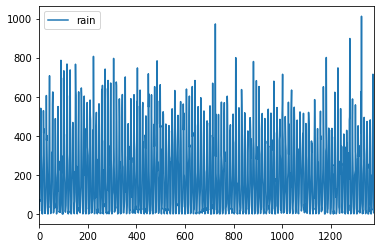

In [5]:
weather[['rain']].plot()

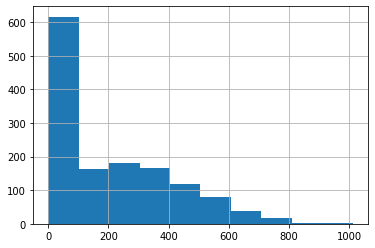

In [6]:
weather.rain.hist()

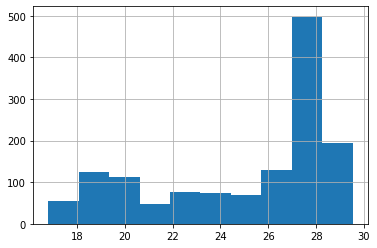

In [7]:
weather.tem.hist()

No handles with labels found to put in legend.


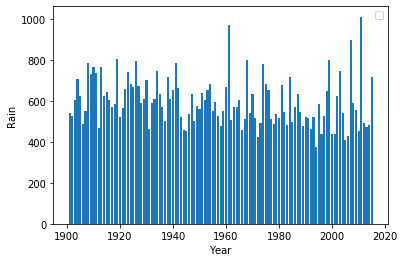

In [8]:
plt.bar(weather['Year'],weather['rain'])
plt.xlabel("Year")
plt.ylabel("Rain")
plt.legend()

No handles with labels found to put in legend.


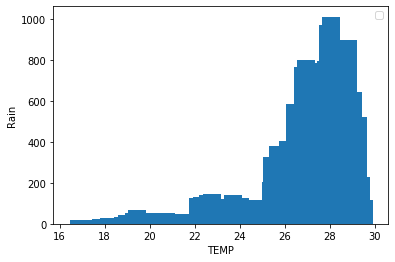

In [9]:
plt.bar(weather['tem'],weather['rain'])
plt.xlabel("TEMP")
plt.ylabel("Rain")
plt.legend()

In [10]:
correlation = weather.corr()

In [11]:
correlation

,tem,Month,Year,rain
tem,1.000000,0.159809,0.051686,0.699846
Month,0.159809,1.000000,0.000000,0.135204
Year,0.051686,0.000000,1.000000,-0.027024
rain,0.699846,0.135204,-0.027024,1.000000


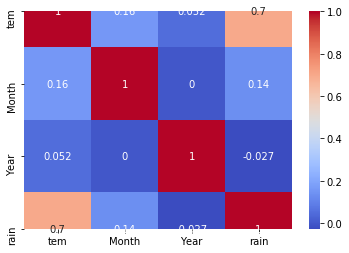

In [12]:
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [13]:
sns.set(style="whitegrid",color_codes=True)

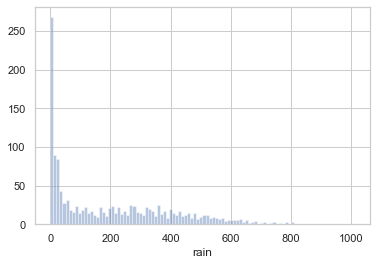

In [14]:
sns.distplot(weather['rain'], kde=False, bins=100);

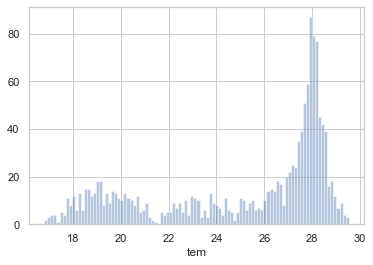

In [15]:
sns.distplot(weather['tem'],kde=False, bins=100);

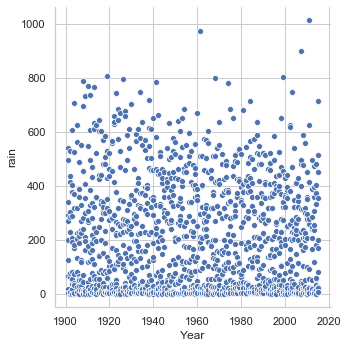

In [16]:
sns.relplot(x="Year", y="rain", data=weather);

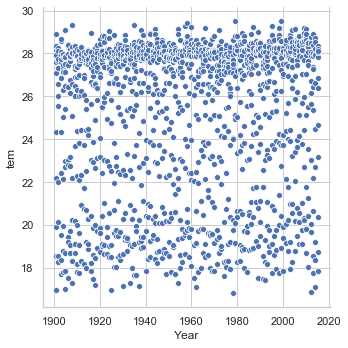

In [17]:
sns.relplot(x="Year", y="tem", data=weather);

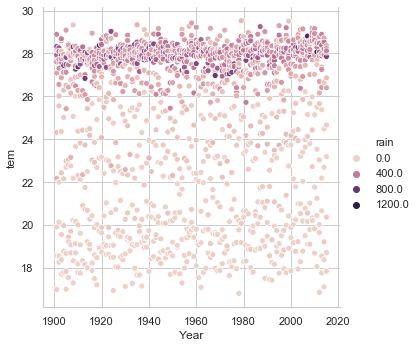

In [18]:
sns.relplot(x="Year", y="tem", hue="rain", data=weather);

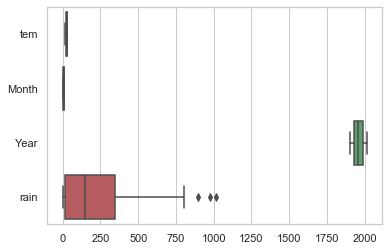

In [19]:
sns.boxplot(data=weather,orient='h')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [44]:
weather.head()
X = weather.drop('rain',axis=1)
y = weather[['rain']]

In [45]:
X.head()

,tem,Month,Year
0,16.9760,1,1901
1,19.9026,2,1901
2,24.3158,3,1901
3,28.1834,4,1901
4,27.8892,5,1901


In [46]:
y.head()

,rain
0,18.5356
1,16.2548
2,70.7981
3,66.1616
4,267.2150


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)
result = y_test
scaler = MinMaxScaler()

scaler.fit(y_train)
y_train =scaler.transform(y_train) # we transform the y so after predict we have to inverse transeform it
scaler.fit(y_test)
y_test =scaler.transform(y_test) # we transform the y so after predict we have to inverse transeform it

In [66]:
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM,Flatten


In [67]:
print (x_train.shape)
print (x_test.shape)

(1104, 3, 1)
(276, 3, 1)


In [68]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [69]:
x_train

array([[[  26.8891],
        [  10.    ],
        [1956.    ]],

       [[  27.7138],
        [   8.    ],
        [1943.    ]],

       [[  28.2071],
        [   7.    ],
        [1973.    ]],

       ...,

       [[  23.1647],
        [  11.    ],
        [1920.    ]],

       [[  28.2602],
        [   9.    ],
        [1987.    ]],

       [[  20.3254],
        [  12.    ],
        [1951.    ]]])

In [70]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [71]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1104, 3, 1)
(276, 3, 1)
(1104, 1)
(276, 1)


In [72]:
def RNN_model():
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1)) #we want single feature output which is df['Close']
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
    return regressor

In [73]:
regressor = RNN_model()

Instructions for updating:
Colocations handled automatically by placer.


In [74]:
regressor.fit(x_train,y_train,epochs = 100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1104/1104 [==============================] - 17s 16ms/step - loss: 0.0399
Epoch 2/100
1104/1104 [==============================] - 0s 416us/step - loss: 0.0295
Epoch 3/100
1104/1104 [==============================] - 0s 402us/step - loss: 0.0240
Epoch 4/100
1104/1104 [==============================] - 0s 406us/step - loss: 0.0204
Epoch 5/100
1104/1104 [==============================] - 0s 415us/step - loss: 0.0191
Epoch 6/100
1104/1104 [==============================] - 0s 413us/step - loss: 0.0182
Epoch 7/100
1104/1104 [==============================] - 0s 431us/step - loss: 0.0157
Epoch 8/100
1104/1104 [==============================] - 1s 481us/step - loss: 0.0145
Epoch 9/100
1104/1104 [==============================] - 0s 432us/step - loss: 0.0140
Epoch 10/100
1104/1104 [==============================] - 0s 41

1104/1104 [==============================] - 0s 439us/step - loss: 0.0072
Epoch 88/100
1104/1104 [==============================] - 0s 426us/step - loss: 0.0080
Epoch 89/100
1104/1104 [==============================] - 1s 506us/step - loss: 0.0074
Epoch 90/100
1104/1104 [==============================] - 1s 461us/step - loss: 0.0078
Epoch 91/100
1104/1104 [==============================] - 1s 472us/step - loss: 0.0077
Epoch 92/100
1104/1104 [==============================] - 1s 471us/step - loss: 0.0078
Epoch 93/100
1104/1104 [==============================] - 0s 423us/step - loss: 0.0075
Epoch 94/100
1104/1104 [==============================] - 0s 418us/step - loss: 0.0083
Epoch 95/100
1104/1104 [==============================] - 0s 422us/step - loss: 0.0074
Epoch 96/100
1104/1104 [==============================] - 0s 423us/step - loss: 0.0074
Epoch 97/100
1104/1104 [==============================] - 0s 423us/step - loss: 0.0079
Epoch 98/100
1104/1104 [==============================] 

In [75]:
y_pred = regressor.predict(x_test)

In [76]:
y_pred

array([[ 3.14642265e-02],
       [-6.75027072e-03],
       [ 2.71064699e-01],
       [-9.76750255e-03],
       [-2.97252834e-03],
       [-7.66813755e-05],
       [ 4.51776803e-01],
       [ 4.49187338e-01],
       [ 1.35924026e-01],
       [ 3.71003151e-01],
       [ 3.38983759e-02],
       [ 8.13980773e-02],
       [ 1.37831047e-01],
       [ 3.38277459e-01],
       [ 1.66621357e-02],
       [ 1.12631619e-02],
       [ 1.32825240e-01],
       [ 2.12015063e-01],
       [ 4.41342220e-02],
       [ 2.44859666e-01],
       [-3.85753810e-04],
       [ 3.74337658e-02],
       [ 4.49788272e-01],
       [ 4.39759120e-02],
       [ 1.07978500e-01],
       [-1.07567012e-02],
       [ 4.44728583e-01],
       [ 2.74171531e-01],
       [ 2.51411647e-02],
       [ 2.06286982e-02],
       [ 2.72016972e-03],
       [ 1.14084557e-01],
       [ 1.43051952e-01],
       [ 3.32335979e-02],
       [-1.40401721e-03],
       [-7.28368759e-05],
       [ 3.69941592e-02],
       [ 4.59124923e-01],
       [ 1.9

In [77]:
output = scaler.inverse_transform(y_pred)

In [78]:
real_output = []
for item in output:
    real_output.append((item[0]))

In [79]:
real_output

[28.259552,
 -6.0597224,
 243.43742,
 -8.769406,
 -2.667047,
 -0.0663752,
 405.72946,
 403.40393,
 122.07172,
 333.18912,
 30.445587,
 73.10362,
 123.78435,
 303.79916,
 14.966247,
 10.117592,
 119.28879,
 190.40675,
 39.63809,
 219.90349,
 -0.34394374,
 33.620613,
 403.94363,
 39.495914,
 96.974686,
 -9.657776,
 399.39966,
 246.22758,
 22.581005,
 18.528496,
 2.4453914,
 102.45835,
 128.47308,
 29.84857,
 -1.258415,
 -0.06292258,
 33.225815,
 412.32858,
 172.0883,
 2.902791,
 195.81525,
 355.16827,
 203.90334,
 36.69559,
 100.00829,
 6.347329,
 243.46098,
 51.458412,
 356.94116,
 242.60095,
 24.457634,
 72.32412,
 99.95032,
 30.477015,
 168.28345,
 360.33456,
 23.727003,
 -1.6371603,
 120.26658,
 357.47122,
 145.24199,
 184.16554,
 30.551823,
 216.68083,
 357.77277,
 11.354309,
 369.8908,
 124.41705,
 43.11204,
 44.264053,
 139.74034,
 1.4456015,
 395.31418,
 242.80638,
 -16.111847,
 357.81207,
 243.08052,
 403.61575,
 243.41751,
 128.1753,
 -1.3116497,
 31.792788,
 -13.531651,
 358.8

In [80]:
result['predited value'] = np.array(real_output)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
result.head()


,rain,predited value
98,0.05684,28.259552
228,2.20118,-6.059722
248,239.81800,243.437424
240,25.53790,-8.769406
1249,6.00206,-2.667047


In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(result['rain']), np.array(result['predited value']))

In [103]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 11793.38024015486
MSE: 108.5973307229734


In [104]:
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
X = weather.drop('rain',axis=1)
y = weather[['rain']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [106]:
knn = KNeighborsRegressor(n_neighbors=5)


In [107]:
knn.fit(x_train,y_train)
predicted=knn.predict(x_test)

In [108]:
predicted

array([[362.1782  ],
       [  1.878564],
       [494.8436  ],
       [115.697508],
       [377.602   ],
       [292.7662  ],
       [507.349   ],
       [234.164   ],
       [536.372   ],
       [170.9079  ],
       [ 10.526732],
       [248.6378  ],
       [605.2798  ],
       [287.35    ],
       [383.5076  ],
       [ 23.133538],
       [507.7308  ],
       [289.7608  ],
       [256.9022  ],
       [423.8798  ],
       [  6.337798],
       [488.297   ],
       [  2.585508],
       [286.9048  ],
       [ 21.511416],
       [458.3682  ],
       [183.7768  ],
       [ 20.220294],
       [502.1708  ],
       [ 11.355774],
       [388.0922  ],
       [349.77718 ],
       [546.5742  ],
       [218.7143  ],
       [598.465   ],
       [369.5018  ],
       [550.3438  ],
       [ 66.244686],
       [225.09466 ],
       [526.3942  ],
       [ 80.640322],
       [325.1484  ],
       [432.0086  ],
       [399.6194  ],
       [ 34.03604 ],
       [373.37266 ],
       [ 16.71107 ],
       [ 10.3

In [109]:
real_output = []
for item in predicted:
    real_output.append((item[0]))

In [110]:
real_output

[362.17820000000006,
 1.8785639999999997,
 494.8436,
 115.697508,
 377.60200000000003,
 292.76619999999997,
 507.349,
 234.16400000000004,
 536.372,
 170.9079,
 10.526731999999999,
 248.63780000000003,
 605.2798,
 287.35,
 383.5076,
 23.133537999999998,
 507.7308,
 289.7608,
 256.9022,
 423.8798,
 6.337798,
 488.297,
 2.5855080000000004,
 286.90479999999997,
 21.511416,
 458.36820000000006,
 183.7768,
 20.220294000000003,
 502.17080000000004,
 11.355774,
 388.0922,
 349.77718,
 546.5741999999999,
 218.7143,
 598.4649999999999,
 369.5018,
 550.3438,
 66.244686,
 225.09466000000003,
 526.3942,
 80.640322,
 325.14840000000004,
 432.00859999999994,
 399.6194,
 34.03604,
 373.37266,
 16.71107,
 10.384462,
 8.632812,
 4.640518,
 55.462013999999996,
 35.760276,
 450.6728,
 16.495524,
 449.1852,
 369.38759999999996,
 13.956615999999997,
 11.978874000000001,
 16.74378,
 241.7614,
 57.732094000000004,
 10.131554,
 52.8871,
 21.054160000000003,
 232.8279,
 480.92980000000006,
 400.2224,
 387.7361

In [111]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(y_test), np.array(real_output))

In [112]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 9964.904354866207
MSE: 99.82436754052694


In [113]:
accuracy=[]
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy.append(knn.score(x_test,y_test))


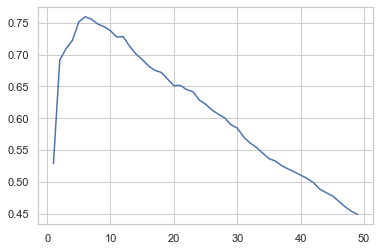

In [114]:
plt.plot(range(1,50),accuracy)

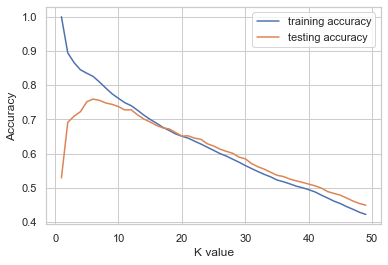

In [115]:
training_accuracy=[]
testing_accuracy=[]

neighbors = list(range(1,50))


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))    

plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,testing_accuracy,label='testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("K value")
plt.legend()

In [116]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(knn,X,y,cv=10)

print (scores)
print (scores.mean())

print ("Mean Accuracy "+str(scores.mean()))

[0.53926205 0.63794373 0.63591033 0.6132531  0.70957694 0.65164386
 0.68751551 0.68529809 0.59948161 0.57247632]
0.6332361530807367
Mean Accuracy 0.6332361530807367


[0.5890862800332627, 0.6368412357716976, 0.6251761466175294, 0.635131905707175, 0.6332361530807367, 0.6240289491085217, 0.6146147414997081, 0.5932227642880721, 0.5790634878801005, 0.5654580681628537, 0.5539408488627677, 0.5502078592164259, 0.5435095390772633, 0.5371952374012771, 0.5213913830423494, 0.5108500900341703, 0.5000941004449586, 0.48975940807935625, 0.4856129507215143, 0.4746927772419194, 0.46610143580782876, 0.45696397411776524, 0.4449989935124198, 0.436538713158126, 0.4240497048372494, 0.4139526525889913, 0.406609075788854, 0.40160785078752215, 0.39513067306474814, 0.3909585186926251, 0.3824885396086105, 0.3791323790945146, 0.37193650066123923, 0.36629309819768263, 0.36070701438600195, 0.35530915992143586, 0.3490393727230455, 0.34224798499785924, 0.33827620924195567, 0.3332144266850137, 0.327320875525738, 0.3215561550409562, 0.31595712644398144, 0.31063489186640314, 0.3055315803108783, 0.3050221750332077, 0.3051704674402034, 0.30375369421732595, 0.30326175496278523]


Text(0, 0.5, 'scores')

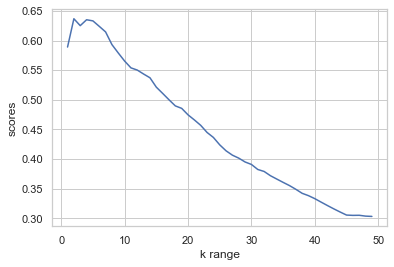

In [117]:
k_range = range(1,50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10)
    k_scores.append(scores.mean())
    
print (k_scores)


plt.plot(k_range,k_scores)
plt.xlabel("k range")
plt.ylabel("scores")

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
tree_clf = DecisionTreeRegressor(max_depth=2,random_state=42)

In [120]:
tree_clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [121]:
tree_clf.score(X,y)

0.7059955999135619

In [122]:
accuracy=[]
for depth in range(1,50):
    dt = DecisionTreeRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

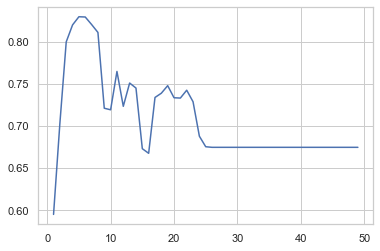

In [123]:
plt.plot(range(1,50),accuracy)

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rnd = RandomForestRegressor(max_depth=10)

In [126]:
rnd.fit(x_train,y_train)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [127]:
rnd.score(x_test,y_test)

0.8122802952426994

In [128]:
accuracy=[]
for depth in range(1,50):
    dt = RandomForestRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change

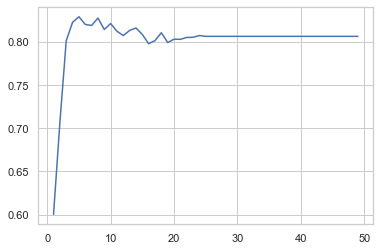

In [129]:
plt.plot(range(1,50),accuracy)

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from mlxtend.regressor import StackingRegressor
lsvc=LinearSVR()
dtc=DecisionTreeRegressor()
knnc=KNeighborsRegressor()
svc=SVR()
gbc=GradientBoostingRegressor()
rfc=RandomForestRegressor()

In [132]:
stregr = StackingRegressor(regressors=[lsvc,dtc,knnc,svc,gbc,rfc], 
                           meta_regressor=lsvc)

In [133]:
stregr.fit(x_train, y_train)

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.

StackingRegressor(meta_regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                           fit_intercept=True,
                                           intercept_scaling=1.0,
                                           loss='epsilon_insensitive',
                                           max_iter=1000, random_state=None,
                                           tol=0.0001, verbose=0),
                  refit=True,
                  regressors=[LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                        fit_intercept=True,
                                        intercept_scaling=1.0,
                                        loss='epsilon_insensitive',
                                        max_iter=1000, random_state=N...
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
       

In [134]:
prediction = stregr.predict(x_test)

In [135]:
stregr.score(x_test,y_test)

0.724446422211642